# Tarefa 1  – Diagnóstico de diabetes

## 1. Problema

Identificar se o paciente possui ou não diabetes.

## 2. Dados

Os dados são providos na tarefa.
Tirados do desafio do kaggle: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Setting Workspace

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

# Getting the Data

In [ ]:
file = '/content/drive/My Drive/CBPF/Deep Learning/ML Dados/dados_dia/Pima-Diabetes.csv'
data = pd.read_csv(file, names=['pregnancies','glucose','diastolic','triceps','insulin',
                                'bmi','dpf','age','diabetes'])

In [ ]:
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,3.835092,120.898417,69.080475,20.562005,80.445910,31.986807,0.473872,33.178100,0.349604
std,3.366708,31.962560,19.452346,15.944197,115.660331,7.906592,0.332488,11.692841,0.477160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,128.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are somo 0's on the data set, let's substitude by the column mean

In [ ]:
# pregnancies can be 0, but the column below can't
columns_with_zeros = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']

def check_zeros(data, columns):
  for c in columns:
    print('Column %s: num 0s: %d' % (c, len(data.loc[data[c] == 0, c])))

check_zeros(data, columns_with_zeros)

Column glucose: num 0s: 5
Column diastolic: num 0s: 35
Column triceps: num 0s: 223
Column insulin: num 0s: 367
Column bmi: num 0s: 11


## Separate data

In [ ]:
# Input features
X = data.drop(columns=['diabetes'])
# Target variable
y = data['diabetes']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((606, 8), (152, 8), (606,), (152,))

## Overwriting 0's with the column's mean

In [ ]:
def sub_zero_mean(data, columns):
  for c in columns:
    non_zero_items = data.loc[data[c] != 0, c]
    mean = np.sum(non_zero_items) / len(non_zero_items)
    n_zeros = len(data.loc[data[c] == 0, c])
    data.loc[data[c] == 0, c] = mean
    print('Column: %s -> fixed %d items with value: %.2f' % (c, n_zeros, mean))

sub_zero_mean(X_train, columns_with_zeros)

Column: glucose -> fixed 4 items with value: 121.36
Column: diastolic -> fixed 30 items with value: 72.90
Column: triceps -> fixed 184 items with value: 29.24
Column: insulin -> fixed 297 items with value: 155.92
Column: bmi -> fixed 10 items with value: 32.69


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
# Cheking substitution 
check_zeros(X_train, columns_with_zeros)

Column glucose: num 0s: 0
Column diastolic: num 0s: 0
Column triceps: num 0s: 0
Column insulin: num 0s: 0
Column bmi: num 0s: 0


In [ ]:
sub_zero_mean(X_val, columns_with_zeros)

Column: glucose -> fixed 1 items with value: 123.05
Column: diastolic -> fixed 5 items with value: 70.56
Column: triceps -> fixed 39 items with value: 28.73
Column: insulin -> fixed 70 items with value: 156.09
Column: bmi -> fixed 1 items with value: 31.56


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
# Cheking substitution 
check_zeros(X_val, columns_with_zeros)

Column glucose: num 0s: 0
Column diastolic: num 0s: 0
Column triceps: num 0s: 0
Column insulin: num 0s: 0
Column bmi: num 0s: 0


In [ ]:
X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values

# Building Model

In [ ]:
NB_EPOCHS = 1000
BATCH_SIZE = 16

def model():

  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu', kernel_initializer='uniform'))
  #model.add(Dropout(0.3))
  # Hidden Layer
  model.add(Dense(8, activation='relu', kernel_initializer='uniform'))
  #model.add(Dropout(0.3))
  #model.add(Dense(50, activation='softmax'))
  #model.add(Dropout(0.3))
  # Output layer
  model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

  model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')

  # Checkpoint: store the best model
  checkpoint_model = 'tarefa1-weights.best.hdf5'
  checkpoint = ModelCheckpoint(checkpoint_model,
                               monitor='val_accuracy',
                               verbose=1,
                               save_best_only=True,
                               mode='max')
  callbacks_list = [checkpoint]

  print('Starting model training...')

  out = model.fit(X_train, y_train, 
                  epochs=NB_EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(X_val, y_val), 
                  callbacks=callbacks_list,
                  verbose=0)

  return out, model 

In [ ]:
out, model = model()

Starting model training...

Epoch 00001: val_accuracy improved from -inf to 0.69079, saving model to tarefa1-weights.best.hdf5

Epoch 00002: val_accuracy did not improve from 0.69079

Epoch 00003: val_accuracy did not improve from 0.69079

Epoch 00004: val_accuracy did not improve from 0.69079

Epoch 00005: val_accuracy did not improve from 0.69079

Epoch 00006: val_accuracy did not improve from 0.69079

Epoch 00007: val_accuracy did not improve from 0.69079

Epoch 00008: val_accuracy did not improve from 0.69079

Epoch 00009: val_accuracy did not improve from 0.69079

Epoch 00010: val_accuracy improved from 0.69079 to 0.76316, saving model to tarefa1-weights.best.hdf5

Epoch 00011: val_accuracy did not improve from 0.76316

Epoch 00012: val_accuracy did not improve from 0.76316

Epoch 00013: val_accuracy did not improve from 0.76316

Epoch 00014: val_accuracy did not improve from 0.76316

Epoch 00015: val_accuracy did not improve from 0.76316

Epoch 00016: val_accuracy did not improve

In [ ]:
print('Training Loss: ', np.mean(out.history["loss"]))
print('Training Accuracy: ', np.mean(out.history["accuracy"]))
print('=========================')
print('Validation Loss: ', np.mean(out.history["val_loss"]))
print('Validation Accuracy: ', np.mean(out.history["val_accuracy"]))

Training Loss:  0.4716215243935585
Training Accuracy:  0.7644636978507042
Validation Loss:  0.4006304730474949
Validation Accuracy:  0.8134802632331848


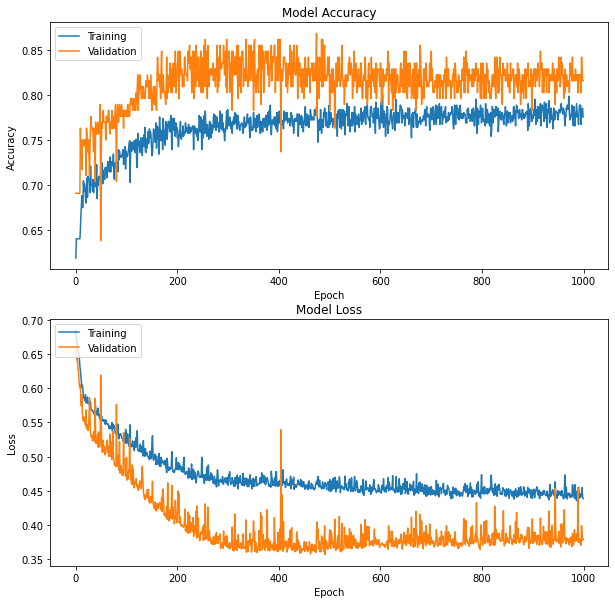

In [ ]:
fig, ([ax0, ax1]) = plt.subplots(nrows=2, 
                                ncols=1,
                                figsize=(10,10))

# Add data to ax0
ax0.plot(out.history["accuracy"])
ax0.plot(out.history["val_accuracy"])
# Change the y axis limits
#ax2.set_ylim([0.6, 0.9])
# Customize ax0
ax0.set(title="Model Accuracy",
        xlabel="Epoch",
        ylabel="Accuracy");
# Add a legend to ax0
ax0.legend(["Training", "Validation"], loc="upper left");

# Add data to ax1
ax1.plot(out.history["loss"])
ax1.plot(out.history["val_loss"])
# Change the y axis limits
#ax1.set_ylim([0.6, 0.9])
# Customize ax0
ax1.set(title="Model Loss",
        xlabel="Epoch",
        ylabel="Loss");
# Add a legend to ax0
ax1.legend(["Training", "Validation"], loc="upper left");

In [ ]:
file_test = '/content/drive/My Drive/CBPF/Deep Learning/ML Dados/dados_dia/Test-Group-2.csv'
data2 = pd.read_csv(file_test, names=['pregnancies','glucose', 'diastolic',
                                'triceps', 'insulin', 'bmi', 'dpf', 
                                 'age'])
data2.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,1,106,76,0,0,37.5,0.197,26
1,6,190,92,0,0,35.5,0.278,66
2,2,88,58,26,16,28.4,0.766,22
3,9,170,74,31,0,44.0,0.403,43
4,9,89,62,0,0,22.5,0.142,33


In [ ]:
check_zeros(data2, columns_with_zeros)

Column glucose: num 0s: 0
Column diastolic: num 0s: 0
Column triceps: num 0s: 4
Column insulin: num 0s: 7
Column bmi: num 0s: 0


In [ ]:
sub_zero_mean(data2, columns_with_zeros)

Column: glucose -> fixed 0 items with value: 120.60
Column: diastolic -> fixed 0 items with value: 71.00
Column: triceps -> fixed 4 items with value: 31.00
Column: insulin -> fixed 7 items with value: 102.67
Column: bmi -> fixed 0 items with value: 32.43


In [ ]:
check_zeros(data2, columns_with_zeros)

Column glucose: num 0s: 0
Column diastolic: num 0s: 0
Column triceps: num 0s: 0
Column insulin: num 0s: 0
Column bmi: num 0s: 0


In [ ]:
X_test = data2.values
y_pred = model.predict(X_test)
print("Data2: "); print(data2)
print("y_pred:"); print(y_pred)
rounded = [round(y[0]) for y in y_pred]
y_pred1 = np.array(rounded, dtype='int64')
print("\n\n---------CLASSIFICATION RESULT VECTOR---------\n"); print(y_pred1); print("\n\n")

Data2: 
   pregnancies  glucose  diastolic  triceps     insulin   bmi    dpf  age
0            1    106.0       76.0     31.0  102.666667  37.5  0.197   26
1            6    190.0       92.0     31.0  102.666667  35.5  0.278   66
2            2     88.0       58.0     26.0   16.000000  28.4  0.766   22
3            9    170.0       74.0     31.0  102.666667  44.0  0.403   43
4            9     89.0       62.0     31.0  102.666667  22.5  0.142   33
5           10    101.0       76.0     48.0  180.000000  32.9  0.171   63
6            2    122.0       70.0     27.0  102.666667  36.8  0.340   27
7            5    121.0       72.0     23.0  112.000000  26.2  0.245   30
8            1    126.0       60.0     31.0  102.666667  30.1  0.349   47
9            1     93.0       70.0     31.0  102.666667  30.4  0.315   23
y_pred:
[[0.10981322]
 [0.53475314]
 [0.02005458]
 [0.8228456 ]
 [0.01362722]
 [0.15551268]
 [0.34369934]
 [0.1649248 ]
 [0.29636696]
 [0.02628549]]


---------CLASSIFICATION RES

Getting the results from challenge kaggle page: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
y_test = np.array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0])
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.00%
